In [11]:
import yfinance as yf
gme_data = yf.download("GME", start="2023-01-01", end="2024-01-01")

[*********************100%***********************]  1 of 1 completed


In [12]:
gme_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GME,GME,GME,GME,GME
Date,,,,,
2023-01-03,17.200001,19.260000,17.090000,18.639999,5135200
2023-01-04,17.320000,17.930000,16.900000,17.250000,3939300
2023-01-05,16.219999,17.260000,15.890000,17.059999,6066200
2023-01-06,16.459999,16.570000,15.410000,16.000000,4823400
2023-01-09,16.379999,17.129999,16.360001,16.650000,3522600


In [9]:
import matplotlib.pyplot as plt

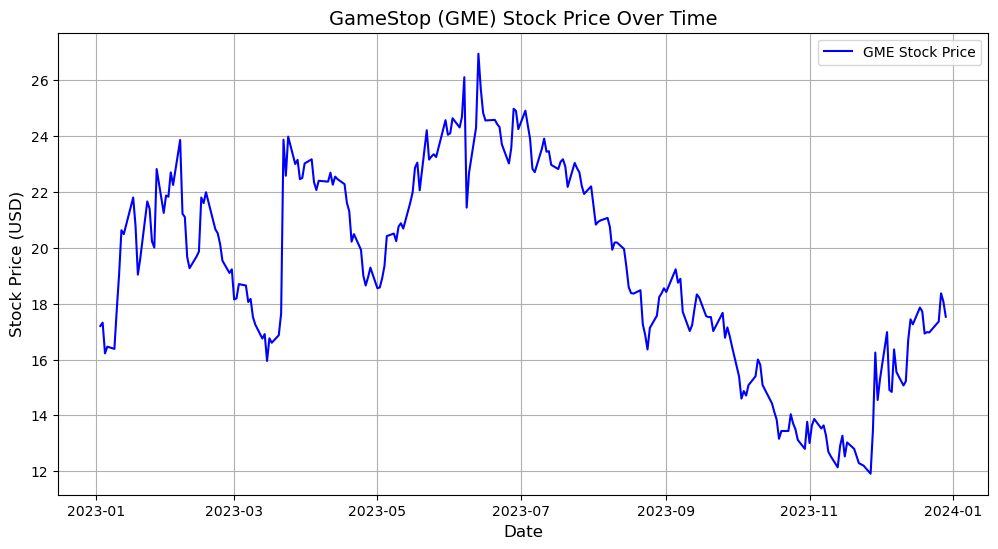

In [13]:
plt.figure(figsize=(12,6))
plt.plot(gme_data.index, gme_data["Close"], label="GME Stock Price", color="blue")

# Formatting the graph
plt.title("GameStop (GME) Stock Price Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
import requests
from bs4 import BeautifulSoup
# URL for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Request the page
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Find the revenue table
tables = soup.find_all("table")

# Extract GameStop revenue table
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        gme_revenue_table = table
        break

# Convert table data to DataFrame
data = []
for row in gme_revenue_table.find_all("tr")[1:]:
    cols = row.find_all("td")
    data.append([col.text.strip() for col in cols])

gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Display last five rows
print(gme_revenue.tail())

# Save to CSV
gme_revenue.to_csv("gme_revenue.csv", index=False)
